In [35]:
# Imports
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
%matplotlib inline

# Carga
PATH = "../../Base_de_datos.csv"   
df = pd.read_csv(PATH)
df_original = df.copy()  # guarda copia

df.head(25)

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
5,505,Dog,Labrador,70,Brown,Large,20.986261,0,0,87,301,1,0
6,506,Bird,Parakeet,169,Brown,Small,10.902613,1,0,70,440,1,0
7,507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1
8,508,Bird,Parakeet,49,Brown,Medium,24.597598,1,1,69,405,0,0
9,509,Bird,Parakeet,60,Gray,Large,7.295994,0,0,73,231,1,0


# 🕵️ Exploración inicial de datos

https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset/data

### ℹ️ Descripción general de los datos:

Este es un dataset de Kaggle con datos de mascotas en adopción, el cuál es sintético, recolectado en un periodo específico de tiempo con propósitos educacionales. 

Si bien esto no lo hace ideal para generalizar el comportamiento de las adopciones, termina siendo ideal para proyectos de Machine Learning o Data Science con interés de aprender, predecir y entender tendencias de adopciones. 

Estos datos se pueden usar para:

- Modelamiento predictivo para determinar la adoptabilidad de una mascota

- Análisis de impacto de varios factores en las tasas de adopción

- Desarrollo de estrategias para incrementar las adopciones.

In [19]:
# info básica y nulos
display(df.describe(include='all').T)

# Porcentaje de nulos por columna
missing = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
display(missing)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PetID,2007.0,NaN,NaN,NaN,1503.0,579.515315,500.0,1001.5,1503.0,2004.5,2506.0
PetType,2007,4,Dog,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breed,2007,7,Rabbit,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeMonths,2007.0,NaN,NaN,NaN,92.279522,52.148363,1.0,48.0,94.0,138.0,179.0
Color,2007,5,White,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,2007,3,Medium,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeightKg,2007.0,NaN,NaN,NaN,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,NaN,NaN,NaN,0.701046,0.457914,0.0,0.0,1.0,1.0,1.0
HealthCondition,2007.0,NaN,NaN,NaN,0.196313,0.397307,0.0,0.0,0.0,0.0,1.0
TimeInShelterDays,2007.0,NaN,NaN,NaN,43.974091,25.740253,1.0,21.0,45.0,66.0,89.0


PetID                 0.0
PetType               0.0
Breed                 0.0
AgeMonths             0.0
Color                 0.0
Size                  0.0
WeightKg              0.0
Vaccinated            0.0
HealthCondition       0.0
TimeInShelterDays     0.0
AdoptionFee           0.0
PreviousOwner         0.0
AdoptionLikelihood    0.0
dtype: float64

### ⛔ *No hay nulos en el dataset*

## 📖 Caracterización de los datos: 

categóricos, numéricos, ordinales, nominales, dicotómicos, politómicos:


```
1. PetID: Unique identifier for each pet. -> No sirve, se borra

2. PetType: Type of pet (e.g., Dog, Cat, Bird, Rabbit). -> Categorico nominal politómico

3. Breed: Specific breed of the pet. -> Categórico nominal politómico

4. AgeMonths: Age of the pet in months. -> numérico discreto

5. Color: Color of the pet. -> categórico nominal politómico

6. Size: Size category of the pet (Small, Medium, Large). -> Categórica ordinal politómica

7. WeightKg: Weight of the pet in kilograms. -> numérico continuo

8. Vaccinated: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated). -> categórica dicotómica

9. HealthCondition: Health condition of the pet (0 - Healthy, 1 - Medical condition). -> categórica dicotómica

10. TimeInShelterDays: Duration the pet has been in the shelter (days). -> numérica discreta

11. AdoptionFee: Adoption fee charged for the pet (in dollars). -> numérica discreta

12. PreviousOwner: Whether the pet had a previous owner (0 - No, 1 - Yes). ->  categórica dicotómica

13. AdoptionLikelihood: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely). -> categórica dicotómica (variable objetivo)
```

In [20]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


None

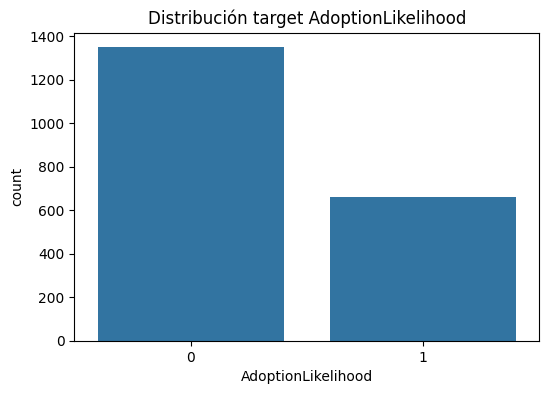

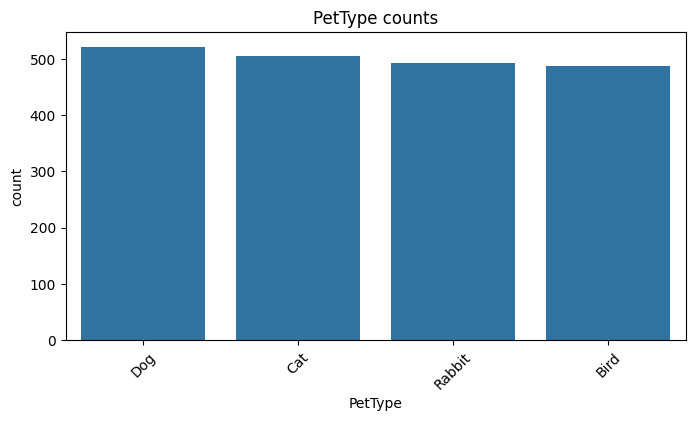

In [21]:
# vistas rápidas de distribuciones y target
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='AdoptionLikelihood', data=df)
plt.title('Distribución target AdoptionLikelihood')
plt.show()

# Conteos por PetType
plt.figure(figsize=(8,4))
sns.countplot(x='PetType', data=df, order=df['PetType'].value_counts().index)
plt.title('PetType counts')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Tipos y conteo de variables
print("Shape:", df.shape)
display(df.dtypes)
display(df.nunique().sort_values(ascending=False).head(50))

# Target balance
display(df['AdoptionLikelihood'].value_counts(dropna=False))
display((df['AdoptionLikelihood'].value_counts(normalize=True)*100).round(2))


Shape: (2007, 13)


PetID                   int64
PetType                object
Breed                  object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object

PetID                 2007
WeightKg              2007
AdoptionFee            493
AgeMonths              179
TimeInShelterDays       89
Breed                    7
Color                    5
PetType                  4
Size                     3
HealthCondition          2
Vaccinated               2
PreviousOwner            2
AdoptionLikelihood       2
dtype: int64

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

AdoptionLikelihood
0    67.16
1    32.84
Name: proportion, dtype: float64

In [23]:
# Detectar strings vacíos y ciertos tokens y convertirlos
def unify_nulls(df):
    df = df.replace(['', ' ', 'NA', 'N/A', 'na', 'nan', 'None', 'none', 'NULL', 'null', -999, 'unknown'], np.nan)
    return df

df = unify_nulls(df)
display((df.isna().sum()/len(df)*100).sort_values(ascending=False))


PetID                 0.0
PetType               0.0
Breed                 0.0
AgeMonths             0.0
Color                 0.0
Size                  0.0
WeightKg              0.0
Vaccinated            0.0
HealthCondition       0.0
TimeInShelterDays     0.0
AdoptionFee           0.0
PreviousOwner         0.0
AdoptionLikelihood    0.0
dtype: float64

In [24]:
# Ejemplo de columnas a eliminar
to_drop = ['PetID']
for col in to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])
print("Dropped:", to_drop)


Dropped: ['PetID']


In [25]:
# Variables categóricas candidatas
cat_cols = ['PetType','Breed','Color','Size']
bin_cols = ['Vaccinated','HealthCondition','PreviousOwner','AdoptionLikelihood']  # target ya es 0/1

# Convertir a category
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Asegurar target entero 0/1
df['AdoptionLikelihood'] = df['AdoptionLikelihood'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetType             2007 non-null   category
 1   Breed               2007 non-null   category
 2   AgeMonths           2007 non-null   int64   
 3   Color               2007 non-null   category
 4   Size                2007 non-null   category
 5   WeightKg            2007 non-null   float64 
 6   Vaccinated          2007 non-null   int64   
 7   HealthCondition     2007 non-null   int64   
 8   TimeInShelterDays   2007 non-null   int64   
 9   AdoptionFee         2007 non-null   int64   
 10  PreviousOwner       2007 non-null   int64   
 11  AdoptionLikelihood  2007 non-null   int64   
dtypes: category(4), float64(1), int64(7)
memory usage: 134.3 KB


,count,mean,std,min,25%,50%,75%,max
AgeMonths,2007.0,92.279522,52.148363,1.000000,48.000000,94.000000,138.00000,179.000000
WeightKg,2007.0,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,0.701046,0.457914,0.000000,0.000000,1.000000,1.00000,1.000000
HealthCondition,2007.0,0.196313,0.397307,0.000000,0.000000,0.000000,0.00000,1.000000
TimeInShelterDays,2007.0,43.974091,25.740253,1.000000,21.000000,45.000000,66.00000,89.000000
AdoptionFee,2007.0,249.142003,142.887040,0.000000,127.000000,242.000000,375.00000,499.000000
PreviousOwner,2007.0,0.301943,0.459215,0.000000,0.000000,0.000000,1.00000,1.000000
AdoptionLikelihood,2007.0,0.328351,0.469730,0.000000,0.000000,0.000000,1.00000,1.000000


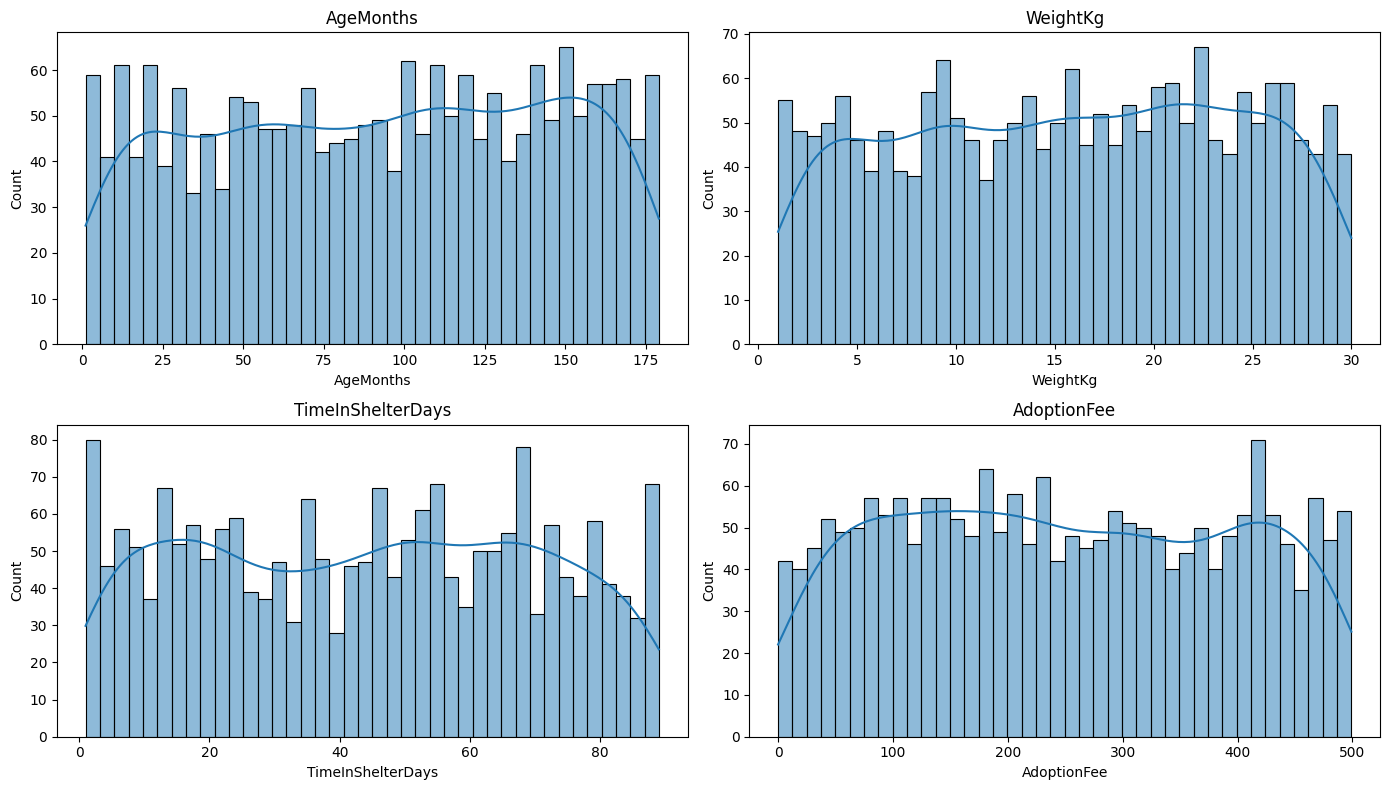

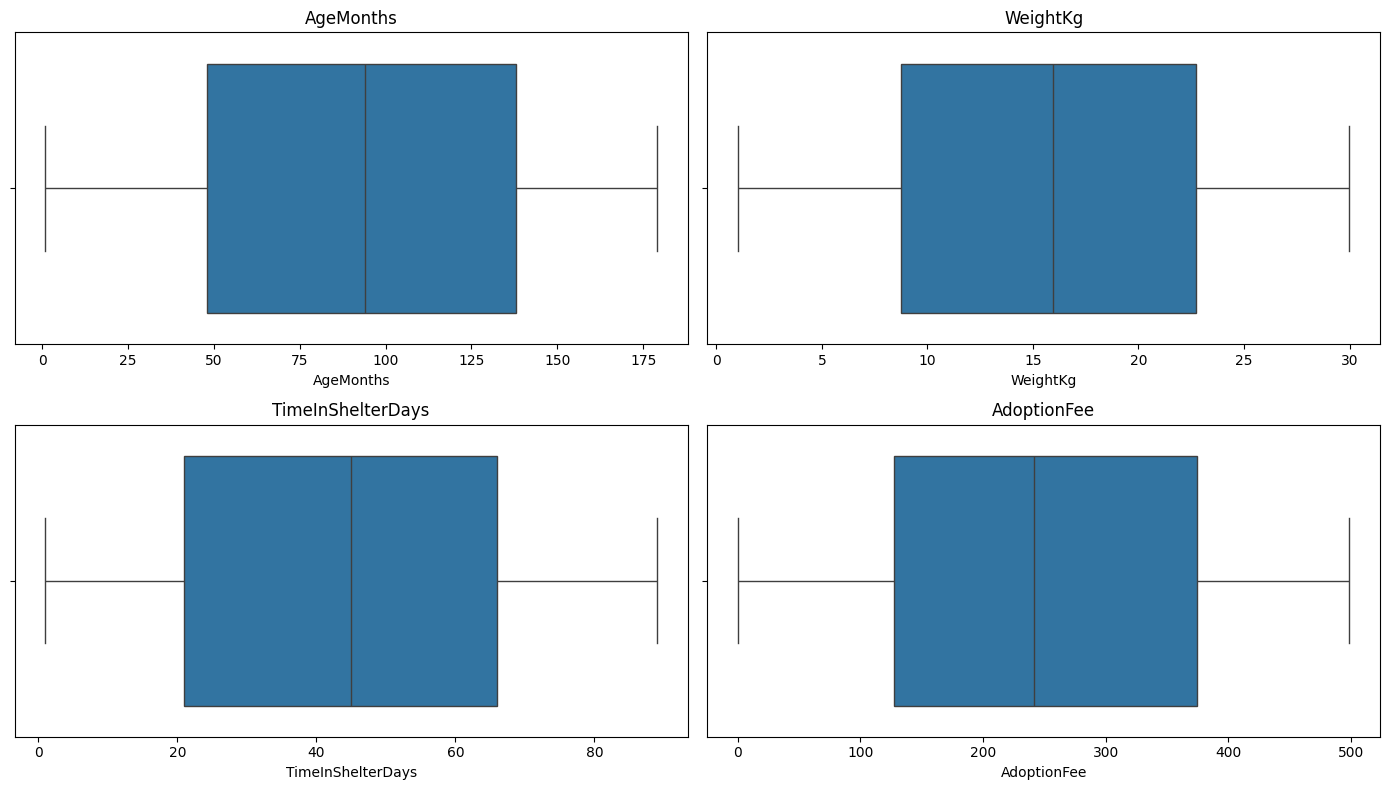

---- PetType ----


PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

---- Breed ----


Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

---- Color ----


Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64

---- Size ----


Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64

In [26]:
# Estadísticas numéricas
display(df.select_dtypes(include=[np.number]).describe().T)

# Histogramas para numéricas
num_cols = ['AgeMonths','WeightKg','TimeInShelterDays','AdoptionFee']
num_cols = [c for c in num_cols if c in df.columns]
plt.figure(figsize=(14,8))
for i,col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14,8))
for i,col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Categóricas: value_counts (top N)
for c in cat_cols:
    if c in df.columns:
        print("----", c, "----")
        display(df[c].value_counts().head(10))


In [27]:
for col in num_cols:
    s = df[col].dropna()
    print(col, " skew:", round(s.skew(),3), " kurtosis:", round(s.kurtosis(),3))


AgeMonths  skew: -0.072  kurtosis: -1.214
WeightKg  skew: -0.062  kurtosis: -1.184
TimeInShelterDays  skew: 0.004  kurtosis: -1.211
AdoptionFee  skew: 0.045  kurtosis: -1.198


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_4440\3080425824.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('PetType')['AdoptionLikelihood'].mean().sort_values(ascending=False)


PetType
Dog       46.36
Bird      30.18
Cat       28.71
Rabbit    25.35
Name: AdoptionLikelihood, dtype: float64

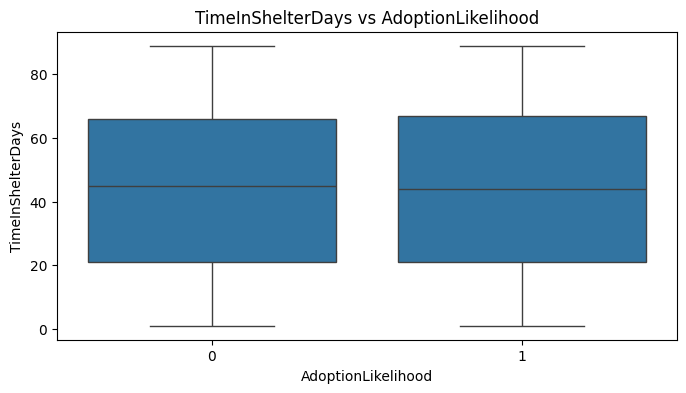

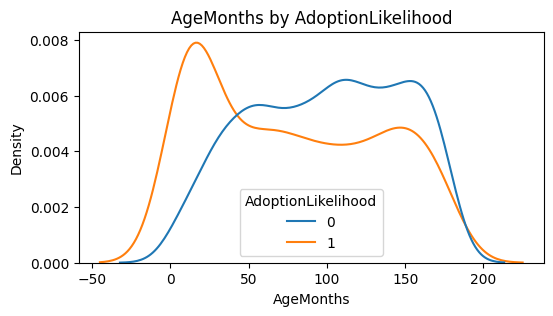

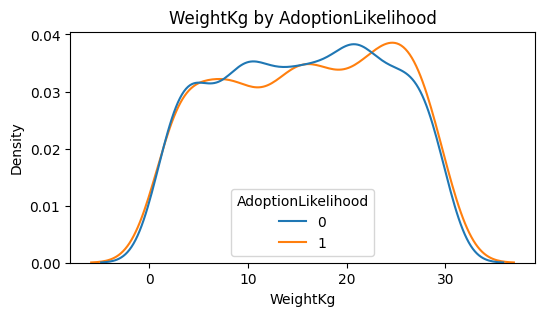

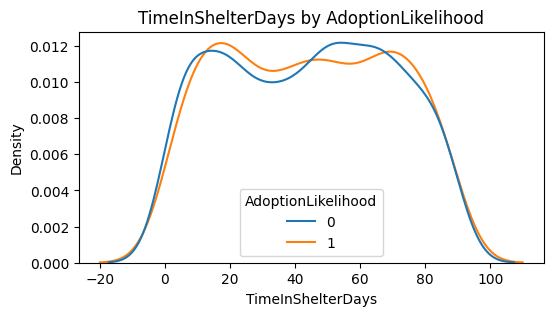

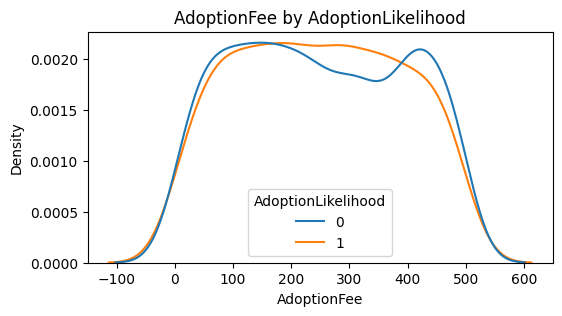

In [28]:
# Proporción de adopción por PetType
if 'PetType' in df.columns:
    prop = df.groupby('PetType')['AdoptionLikelihood'].mean().sort_values(ascending=False)
    display((prop*100).round(2))

# Boxplot de TimeInShelterDays por AdoptionLikelihood
plt.figure(figsize=(8,4))
sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', data=df)
plt.title('TimeInShelterDays vs AdoptionLikelihood')
plt.show()

# Gráficos numéricos por target
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.kdeplot(data=df, x=col, hue='AdoptionLikelihood', common_norm=False)
        plt.title(f'{col} by AdoptionLikelihood')
        plt.show()


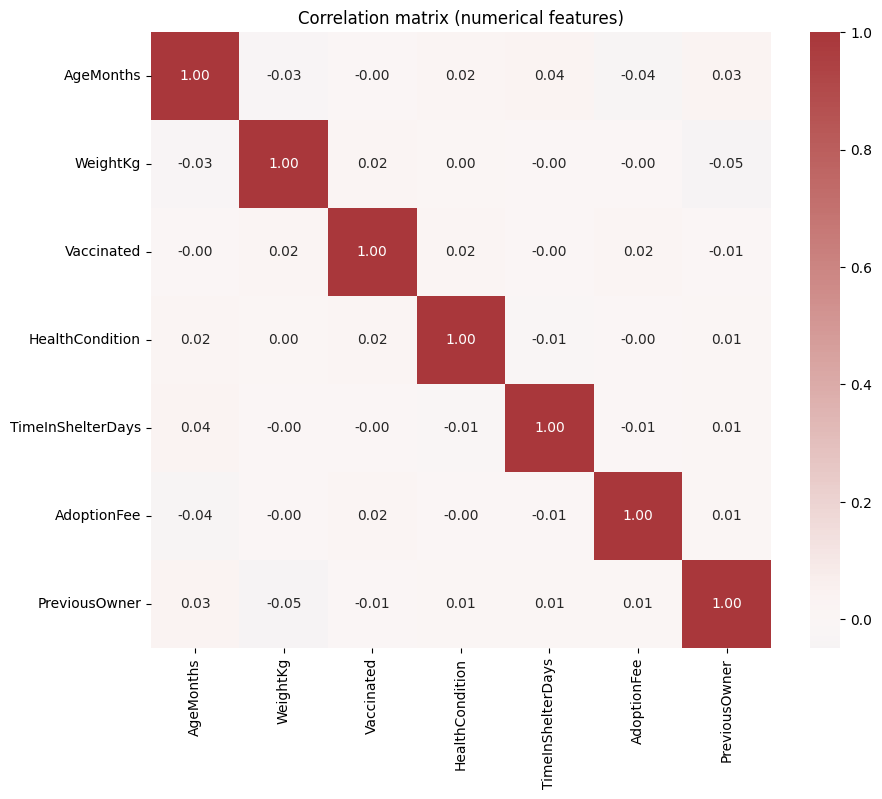

In [29]:
# Correlación entre numéricas (Pearson)
num_df = df.select_dtypes(include=[np.number]).drop(columns=['AdoptionLikelihood'], errors='ignore')
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation matrix (numerical features)')
plt.show()


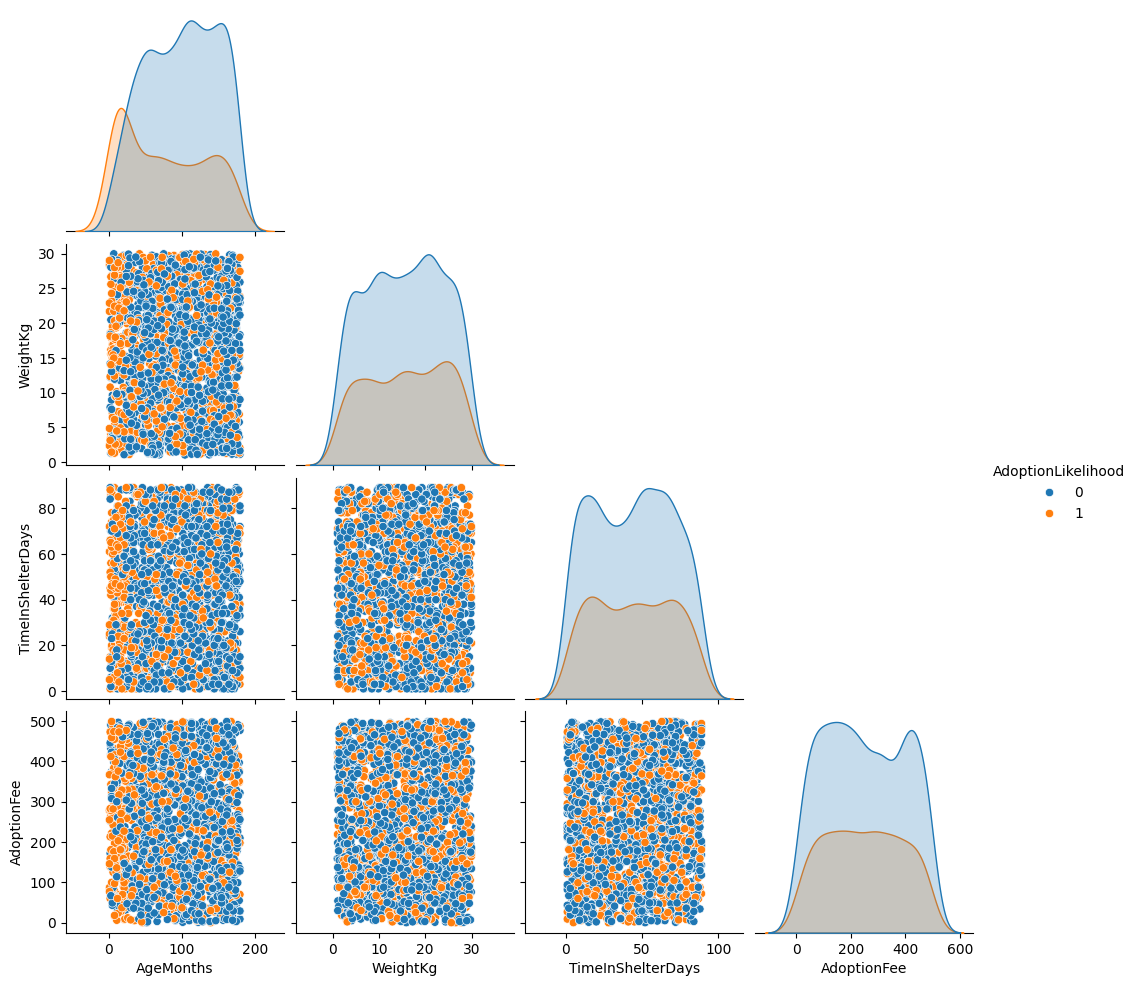

In [30]:
# Pairplot - si pocas columnas numéricas
sample = df.sample(min(2000, len(df)), random_state=42)
sns.pairplot(sample[num_cols + ['AdoptionLikelihood']], hue='AdoptionLikelihood', corner=True)
plt.show()


In [31]:
# Crosstab example: Size vs AdoptionLikelihood
if 'Size' in df.columns:
    display(pd.crosstab(df['Size'], df['AdoptionLikelihood'], normalize='index').round(3)*100)


AdoptionLikelihood,0,1
Size,,
Large,84.6,15.4
Medium,37.7,62.3
Small,82.4,17.6


Reglas de validación de datos (sugerencias)

apartado con reglas detectadas, por ejemplo:

AgeMonths debe ser >= 0 y < 240 (si aparece >1000 es error).

WeightKg > 0 y < 200 (filtrar outliers).

AdoptionFee >= 0; si hay ceros verificar.

TimeInShelterDays no negativo.

Categorías con muy pocos registros agrupar en 'Other' (ej. razas raras).

In [32]:
# Ejemplo de limpieza por reglas
df = df[(df['AgeMonths'].between(0,240)) | (df['AgeMonths'].isna())]
df = df[df['WeightKg'].isna() | (df['WeightKg'].between(0.1,200))]


Features derivados sugeridos

sección con posibles features a crear:

AgeYears = AgeMonths / 12 (más interpretable).

IsPuppy = AgeMonths < 12 (boolean).

FeePerKg = AdoptionFee / WeightKg (si WeightKg disponible).

ShelterTimeBucket = bucketizado de TimeInShelterDays (0-30,31-90,90+).

YoungAndLight combinando edad y peso.

In [33]:
df['AgeYears'] = (df['AgeMonths'] / 12).round(2)
df['IsPuppy'] = (df['AgeMonths'] < 12).astype(int)
df['ShelterTimeBucket'] = pd.cut(df['TimeInShelterDays'], bins=[-1,30,90,10000], labels=['0-30','31-90','90+'])
